# Let's make lots of nice plots across various models

In [1]:
%load_ext autoreload
%autoreload 2
#import libraries and some constants

import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="2"

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LogNorm
import pandas as pd
import uproot as ur
import atlas_mpl_style as ampl
ampl.use_atlas_style()

path_prefix = '/home/mswiatlowski/start_tf/caloml-atlas-new/'
plotpath = path_prefix+'classifier/Plots/'
modelpath = path_prefix+'classifier/Models/'#import libraries and some constants

# import our resolution utilities

import sys
sys.path.append(path_prefix)
from  util import resolution_util as ru
from  util import plot_util as pu
from  util import ml_util as mu

Using TensorFlow backend.


In [2]:
inputpath = '/fast_scratch/atlas_images/v7/'
rootfiles = ["pi0", "piplus", "piminus"]

trees, pdata = mu.setupPionData(inputpath, rootfiles)

np0 = len(pdata['pi0'])
npp = len(pdata['piplus'])
npm = len(pdata['piminus'])

print("Number of pi0 events: {}".format(np0))
print("Number of pi+ events: {}".format(npp))
print("Number of pi- events: {}".format(npm))
print("Total: {}".format(np0+npp+npm))

pcells = {
    ifile : {
        layer : mu.setupCells(itree, layer, flatten = False)
        for layer in mu.cell_meta
    }
    for ifile, itree in trees.items()
}

Number of pi0 events: 263891
Number of pi+ events: 435967
Number of pi- events: 434627
Total: 1134485


In [3]:
import numpy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model
from tensorflow import keras as keras

import tensorflow as tf

# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#   # Restrict TensorFlow to only use the Nth GPU
#   try:
#     tf.config.experimental.set_visible_devices(gpus[2], 'GPU')
#     logical_gpus = tf.config.experimental.list_logical_devices('GPU')
#     print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
#   except RuntimeError as e:
#     # Visible devices must be set before GPUs have been initialized
#     print(e)

In [4]:
training_classes = ['pi0','piplus']
# create train/validation/test subsets containing 70%/10%/20%
# of events from each type of pion event
pdata_merged, pcells_merged, plabels = mu.createTrainingDatasets(training_classes, pdata, pcells)

In [5]:
pcells_EMB2G_channels = mu.setupChannelImages(mu.rescaleImages(pcells_merged, (16, 16)))

In [6]:
pcells_EMB1_flat = pcells_merged['EMB1'].reshape(len(pcells_merged['EMB1']), 128 * 4)

In [7]:
pcells_flat = {
    ifile : {
        layer : mu.setupCells(itree, layer, flatten = True)
        for layer in mu.cell_meta
    }
    for ifile, itree in trees.items()
}


In [8]:
training_dataset = ['pi0','piplus']
pcells_flat_merged = {
    layer : np.concatenate([pcells_flat[ptype][layer]
                            for ptype in training_dataset])
    for layer in mu.cell_meta
}

## Make plots for EMB2G EMB1F

In [9]:
varlist = []
cluster_e = pu.rocVar(
    name='clusterE',
    bins=[1,10,50,500],
    df=pdata_merged,
    latex='Cluster E',
    vlist=varlist,
)

In [10]:
model_EMB2G_EMB1F_2 = tf.keras.models.load_model(modelpath+'model_EMB2G_EMB1F_2.h5')
scores_EMB2G_EMB1F_2 = model_EMB2G_EMB1F_2.predict([pcells_EMB2G_channels, pcells_EMB1_flat])

In [11]:
scores_EMB2G_EMB1F_2[:,1].shape

(699858,)

<Figure size 576x432 with 0 Axes>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


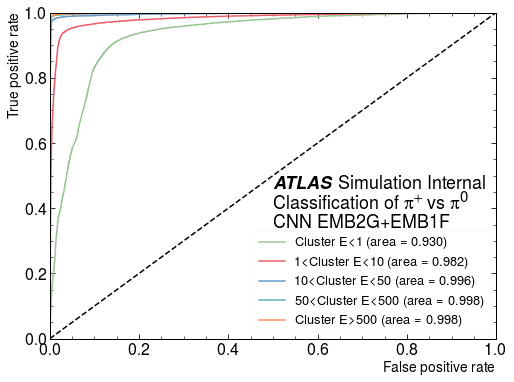

In [12]:
pu.rocScan(varlist, [scores_EMB2G_EMB1F_2[:,1]], ['CNN EMB2G+EMB1F'], plabels, pdata_merged, 
            atlas_x = 0.5, atlas_y = 0.5, simulation = True,
            textlist = [{'x': 0.5, 'y': 0.4, 'text': 'Classification of $\pi^{+}$ vs $\pi^{0}$'},
                        {'x': 0.5, 'y': 0.34, 'text': 'CNN EMB2G+EMB1F'}])

<Figure size 576x432 with 0 Axes>

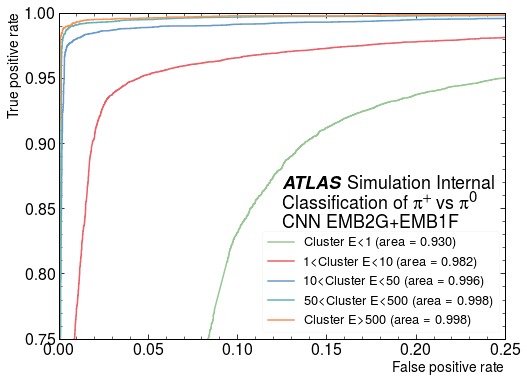

In [13]:
pu.rocScan(varlist, [scores_EMB2G_EMB1F_2[:,1]], ['CNN EMB2G+EMB1F'], plabels, pdata_merged, 
            x_min = 0.0, x_max = 0.25, y_min = 0.75, y_max = 1.0,
            atlas_x = 0.5, atlas_y = 0.5, simulation = True,
            textlist = [{'x': 0.5, 'y': 0.4, 'text': 'Classification of $\pi^{+}$ vs $\pi^{0}$'},
                        {'x': 0.5, 'y': 0.34, 'text': 'CNN EMB2G+EMB1F'}])

/home/mswiatlowski/start_tf/caloml-atlas-new/util/plot_util.py:375: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(y, 1. / x, label=label +
/home/mswiatlowski/start_tf/caloml-atlas-new/util/plot_util.py:375: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(y, 1. / x, label=label +
/home/mswiatlowski/start_tf/caloml-atlas-new/util/plot_util.py:375: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(y, 1. / x, label=label +
/home/mswiatlowski/start_tf/caloml-atlas-new/util/plot_util.py:375: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(y, 1. / x, label=label +
/home/mswiatlowski/start_tf/caloml-atlas-new/util/plot_util.py:375: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(y, 1. / x, label=label +


<Figure size 576x432 with 0 Axes>

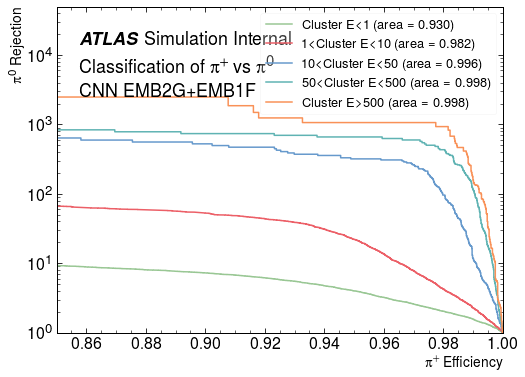

In [14]:
pu.rocScan(varlist, [scores_EMB2G_EMB1F_2[:,1]], ['CNN EMB2G+EMB1F'], plabels, pdata_merged, 
            x_min = 0.85, x_max = 1.0, y_min = 1, y_max = 50000, 
            x_log = False, y_log = True, rejection = True, x_label = '$\pi^{+}$ Efficiency', y_label = '$\pi^{0}$ Rejection',
            atlas_x = 0.05, atlas_y = 0.925, simulation = True,
            textlist = [{'x': 0.05, 'y': 0.8, 'text': 'Classification of $\pi^{+}$ vs $\pi^{0}$'},
                        {'x': 0.05, 'y': 0.725, 'text': 'CNN EMB2G+EMB1F'}])

In [13]:
rocs = pu.buildRocs(varlist, [scores_EMB2G_EMB1F_2[:,1]], ['CNN EMB2G+EMB1F'], plabels, pdata_merged)

In [14]:
for roc in rocs:
    x = rocs[roc]['x']
    y = rocs[roc]['y']

    thresh_index = next(val_y[0] for val_y in enumerate(y) if val_y[1] > 0.95)

    print(thresh_index)
    print(x[thresh_index])
    print(1/x[thresh_index])

    
    

21884
0.24986301369863015
4.00219298245614
11361
0.04533655297313613
22.057256990679097
3270
0.0031358494792249974
318.8928571428571
2962
0.0015152723502671664
659.9473684210526
1202
0.0009402283411685695
1063.5714285714287


In [15]:
pu.rejectionAtEfficiency(rocs, 0.98)

CNN EMB2G+EMB1FCluster E<1 2.032293986636971
CNN EMB2G+EMB1F1<Cluster E<10 4.241997439180538
CNN EMB2G+EMB1F10<Cluster E<50 96.01075268817205
CNN EMB2G+EMB1F50<Cluster E<500 432.37931034482756
CNN EMB2G+EMB1FCluster E>500 930.6249999999999


## Load up piyushnet 1

In [15]:
pcellsE23_EMB2G_channels = mu.setupChannelImages(mu.rescaleImages(pcells_merged, (16, 16), layers=['EMB2', 'EMB3']),last=True)
pcellsE1_EMB1G_channels = mu.setupChannelImages(mu.rescaleImages(pcells_merged, (128, 4), layers=['EMB1']),last=True)
pcellsT123_T1G_channels = mu.setupChannelImages(mu.rescaleImages(pcells_merged, (4, 4), layers=['TileBar0', 'TileBar1', 'TileBar2']),last=True)

In [16]:
model_p1_d02 = tf.keras.models.load_model(modelpath+'model_p1_d02.h5')

In [17]:

scores_p1_d02 = model_p1_d02.predict([pcellsE1_EMB1G_channels, pcellsE23_EMB2G_channels, pcellsT123_T1G_channels])

<Figure size 576x432 with 0 Axes>

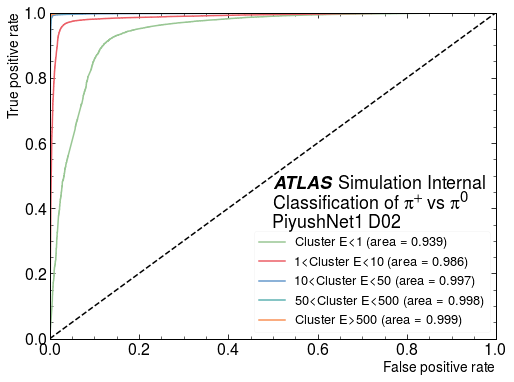

In [18]:
pu.rocScan(varlist, [scores_p1_d02[:,1]], ['p1_d02'], plabels, pdata_merged, 
            atlas_x = 0.5, atlas_y = 0.5, simulation = True,
            textlist = [{'x': 0.5, 'y': 0.4, 'text': 'Classification of $\pi^{+}$ vs $\pi^{0}$'},
                        {'x': 0.5, 'y': 0.34, 'text': 'PiyushNet1 D02'}])

<Figure size 576x432 with 0 Axes>

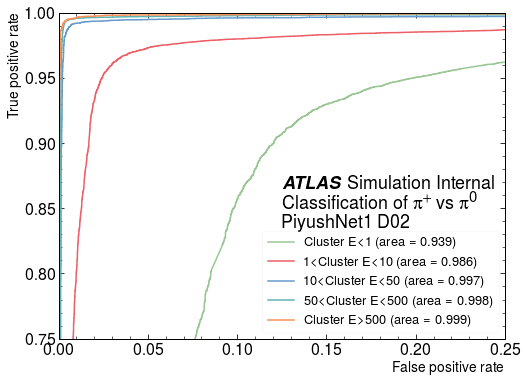

In [19]:
pu.rocScan(varlist, [scores_p1_d02[:,1]], ['p1_d02'], plabels, pdata_merged, 
            x_min = 0.0, x_max = 0.25, y_min = 0.75, y_max = 1.0,
            atlas_x = 0.5, atlas_y = 0.5, simulation = True,
            textlist = [{'x': 0.5, 'y': 0.4, 'text': 'Classification of $\pi^{+}$ vs $\pi^{0}$'},
                        {'x': 0.5, 'y': 0.34, 'text': 'PiyushNet1 D02'}])

/home/mswiatlowski/start_tf/caloml-atlas-new/util/plot_util.py:375: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(y, 1. / x, label=label +
/home/mswiatlowski/start_tf/caloml-atlas-new/util/plot_util.py:375: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(y, 1. / x, label=label +
/home/mswiatlowski/start_tf/caloml-atlas-new/util/plot_util.py:375: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(y, 1. / x, label=label +
/home/mswiatlowski/start_tf/caloml-atlas-new/util/plot_util.py:375: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(y, 1. / x, label=label +
/home/mswiatlowski/start_tf/caloml-atlas-new/util/plot_util.py:375: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(y, 1. / x, label=label +


<Figure size 576x432 with 0 Axes>

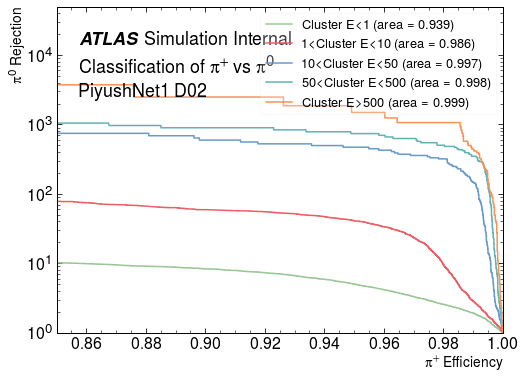

In [20]:
pu.rocScan(varlist, [scores_p1_d02[:,1]], ['p1_d02'], plabels, pdata_merged, 
            x_min = 0.85, x_max = 1.0, y_min = 1, y_max = 50000, 
            x_log = False, y_log = True, rejection = True, x_label = '$\pi^{+}$ Efficiency', y_label = '$\pi^{0}$ Rejection',
            atlas_x = 0.05, atlas_y = 0.925, simulation = True,
            textlist = [{'x': 0.05, 'y': 0.8, 'text': 'Classification of $\pi^{+}$ vs $\pi^{0}$'},
                        {'x': 0.05, 'y': 0.725, 'text': 'PiyushNet1 D02'}])

In [21]:
rocs = pu.buildRocs(varlist, [scores_EMB2G_EMB1F_2[:,1], scores_p1_d02[:,1]], ['CNN_m','p1_d02'], plabels, pdata_merged)

In [22]:
pu.rejectionAtEfficiency(rocs, eff = 0.98)

CNN_mCluster E<1 2.032293986636971
CNN_m1<Cluster E<10 4.241997439180538
CNN_m10<Cluster E<50 96.01075268817205
CNN_m50<Cluster E<500 432.37931034482756
CNN_mCluster E>500 930.6249999999999
p1_d02Cluster E<1 2.5524475524475525
p1_d021<Cluster E<10 9.602898550724637
p1_d0210<Cluster E<50 318.8928571428571
p1_d0250<Cluster E<500 501.56
p1_d02Cluster E>500 1063.5714285714287


In [21]:
model_dense_d02 = tf.keras.models.load_model(modelpath+'model_dense_02.h5')
scores_dense_d02 = model_dense_d02.predict([pcellsE1_EMB1G_channels, pcellsE23_EMB2G_channels, pcellsT123_T1G_channels])

/home/mswiatlowski/start_tf/caloml-atlas-new/util/plot_util.py:375: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(y, 1. / x, label=label +
/home/mswiatlowski/start_tf/caloml-atlas-new/util/plot_util.py:375: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(y, 1. / x, label=label +
/home/mswiatlowski/start_tf/caloml-atlas-new/util/plot_util.py:375: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(y, 1. / x, label=label +
/home/mswiatlowski/start_tf/caloml-atlas-new/util/plot_util.py:375: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(y, 1. / x, label=label +
/home/mswiatlowski/start_tf/caloml-atlas-new/util/plot_util.py:375: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(y, 1. / x, label=label +


<Figure size 576x432 with 0 Axes>

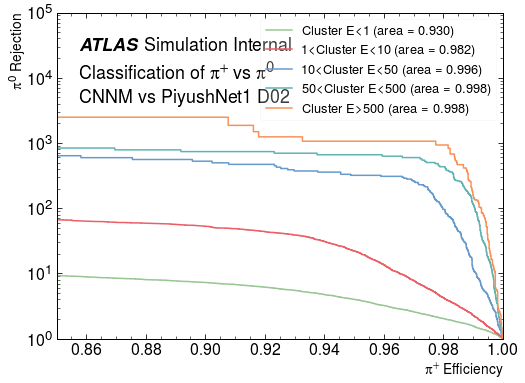

/home/mswiatlowski/start_tf/caloml-atlas-new/util/plot_util.py:375: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(y, 1. / x, label=label +
/home/mswiatlowski/start_tf/caloml-atlas-new/util/plot_util.py:375: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(y, 1. / x, label=label +
/home/mswiatlowski/start_tf/caloml-atlas-new/util/plot_util.py:375: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(y, 1. / x, label=label +
/home/mswiatlowski/start_tf/caloml-atlas-new/util/plot_util.py:375: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(y, 1. / x, label=label +
/home/mswiatlowski/start_tf/caloml-atlas-new/util/plot_util.py:375: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(y, 1. / x, label=label +


<Figure size 576x432 with 0 Axes>

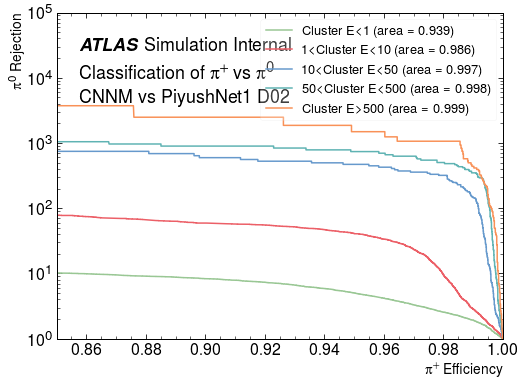

In [22]:
pu.rocScan(varlist, [scores_EMB2G_EMB1F_2[:,1], scores_p1_d02[:,1]], ['cnn_m','p1_d02'], plabels, pdata_merged, 
            x_min = 0.85, x_max = 1.0, y_min = 1, y_max = 100000, 
            x_log = False, y_log = True, rejection = True, x_label = '$\pi^{+}$ Efficiency', y_label = '$\pi^{0}$ Rejection',
            atlas_x = 0.05, atlas_y = 0.925, simulation = True,
            textlist = [{'x': 0.05, 'y': 0.8, 'text': 'Classification of $\pi^{+}$ vs $\pi^{0}$'},
                        {'x': 0.05, 'y': 0.725, 'text': 'CNNM vs PiyushNet1 D02'}])

/home/mswiatlowski/start_tf/caloml-atlas-new/util/plot_util.py:489: RuntimeWarning: divide by zero encountered in true_divide
  line, = plt.plot(y, 1. / x, linestyle=linestyle, color=color,linewidth=3)
/home/mswiatlowski/start_tf/caloml-atlas-new/util/plot_util.py:489: RuntimeWarning: divide by zero encountered in true_divide
  line, = plt.plot(y, 1. / x, linestyle=linestyle, color=color,linewidth=3)
/home/mswiatlowski/start_tf/caloml-atlas-new/util/plot_util.py:489: RuntimeWarning: divide by zero encountered in true_divide
  line, = plt.plot(y, 1. / x, linestyle=linestyle, color=color,linewidth=3)
/home/mswiatlowski/start_tf/caloml-atlas-new/util/plot_util.py:489: RuntimeWarning: divide by zero encountered in true_divide
  line, = plt.plot(y, 1. / x, linestyle=linestyle, color=color,linewidth=3)
/home/mswiatlowski/start_tf/caloml-atlas-new/util/plot_util.py:489: RuntimeWarning: divide by zero encountered in true_divide
  line, = plt.plot(y, 1. / x, linestyle=linestyle, color=color,lin

<Figure size 576x432 with 0 Axes>

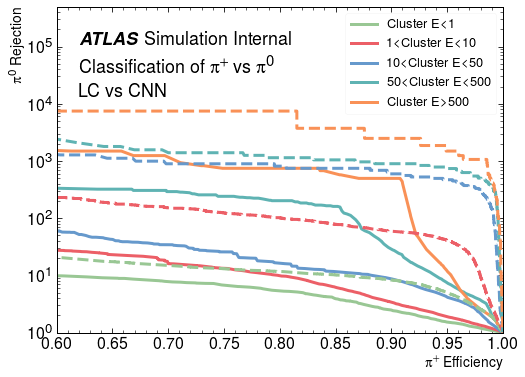

In [23]:
pu.rocScanSingle(varlist, [1-pdata_merged.cluster_EM_PROBABILITY.to_numpy(), scores_p1_d02[:,1]], ['cnn_m','p1_d02'], plabels, pdata_merged, 
            figfile = plotpath+'model_energy_bins_wide.pdf',
            x_min = 0.6, x_max = 1.0, y_min = 1, y_max = 500000, 
            x_log = False, y_log = True, rejection = True, x_label = '$\pi^{+}$ Efficiency', y_label = '$\pi^{0}$ Rejection',
            atlas_x = 0.05, atlas_y = 0.925, simulation = True,
            linestyles = ['-','--'], colorgrouping = 2,
            textlist = [{'x': 0.05, 'y': 0.8, 'text': 'Classification of $\pi^{+}$ vs $\pi^{0}$'},
                        {'x': 0.05, 'y': 0.725, 'text': 'LC vs CNN'}])

/home/mswiatlowski/start_tf/caloml-atlas-new/util/plot_util.py:489: RuntimeWarning: divide by zero encountered in true_divide
  line, = plt.plot(y, 1. / x, linestyle=linestyle, color=color,linewidth=3)
/home/mswiatlowski/start_tf/caloml-atlas-new/util/plot_util.py:489: RuntimeWarning: divide by zero encountered in true_divide
  line, = plt.plot(y, 1. / x, linestyle=linestyle, color=color,linewidth=3)
/home/mswiatlowski/start_tf/caloml-atlas-new/util/plot_util.py:489: RuntimeWarning: divide by zero encountered in true_divide
  line, = plt.plot(y, 1. / x, linestyle=linestyle, color=color,linewidth=3)
/home/mswiatlowski/start_tf/caloml-atlas-new/util/plot_util.py:489: RuntimeWarning: divide by zero encountered in true_divide
  line, = plt.plot(y, 1. / x, linestyle=linestyle, color=color,linewidth=3)
/home/mswiatlowski/start_tf/caloml-atlas-new/util/plot_util.py:489: RuntimeWarning: divide by zero encountered in true_divide
  line, = plt.plot(y, 1. / x, linestyle=linestyle, color=color,lin

<Figure size 576x432 with 0 Axes>

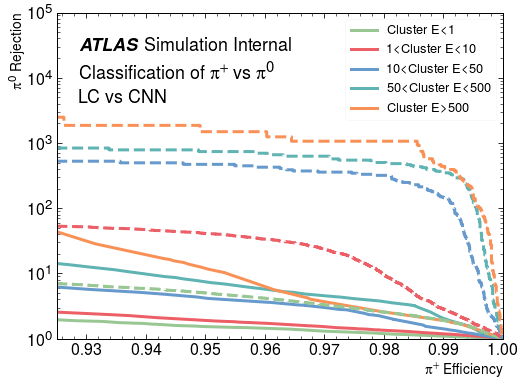

In [24]:
pu.rocScanSingle(varlist, [1-pdata_merged.cluster_EM_PROBABILITY.to_numpy(), scores_p1_d02[:,1]], ['cnn_m','p1_d02'], plabels, pdata_merged, 
            figfile = plotpath+'model_energy_bins.pdf',
            x_min = 0.925, x_max = 1.0, y_min = 1, y_max = 100000, 
            x_log = False, y_log = True, rejection = True, x_label = '$\pi^{+}$ Efficiency', y_label = '$\pi^{0}$ Rejection',
            atlas_x = 0.05, atlas_y = 0.925, simulation = True,
            linestyles = ['-','--'], colorgrouping = 2,
            textlist = [{'x': 0.05, 'y': 0.8, 'text': 'Classification of $\pi^{+}$ vs $\pi^{0}$'},
                        {'x': 0.05, 'y': 0.725, 'text': 'LC vs CNN'}])

In [25]:
incList = []
inclusive = pu.rocVar(
    name='clusterE',
    bins=[0.01,2000],
    df=pdata_merged,
    latex='Cluster E',
    vlist=incList,
)

In [26]:
print(pdata_merged.cluster_EM_PROBABILITY.to_numpy())

[7.0844322e-01 8.4644586e-01 8.9701420e-01 ... 1.3044584e-03 8.2310158e-01
 3.2179127e-04]


/home/mswiatlowski/start_tf/caloml-atlas-new/util/plot_util.py:231: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(x, 1. / y, label=label, linestyle=linestyle, color=color, linewidth=3)
/home/mswiatlowski/start_tf/caloml-atlas-new/util/plot_util.py:231: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(x, 1. / y, label=label, linestyle=linestyle, color=color, linewidth=3)
/home/mswiatlowski/start_tf/caloml-atlas-new/util/plot_util.py:231: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(x, 1. / y, label=label, linestyle=linestyle, color=color, linewidth=3)
/home/mswiatlowski/start_tf/caloml-atlas-new/util/plot_util.py:231: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(x, 1. / y, label=label, linestyle=linestyle, color=color, linewidth=3)


<Figure size 576x432 with 0 Axes>

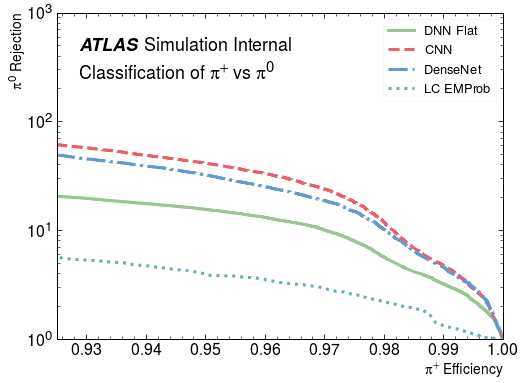

In [33]:
pu.roc_plot_scores([1-combine_score[:,1], 1-scores_p1_d02[:,1], 1-scores_dense_d02[:,1], pdata_merged.cluster_EM_PROBABILITY.to_numpy()], plabels, pdata_merged, 
            figfile = plotpath+'model_compare.pdf',
            labels = ['DNN Flat','CNN', 'DenseNet', 'LC EMProb'],
            x_min = 0.925, x_max = 1.0, y_min = 1, y_max = 1000, 
            x_log = False, y_log = True, rejection = True, 
            x_label = '$\pi^{+}$ Efficiency', y_label = '$\pi^{0}$ Rejection',
            atlas_x = 0.05, atlas_y = 0.925, simulation = True,
            linestyles = ['-','--','-.',':'], colorgrouping = -1,
            textlist = [{'x': 0.05, 'y': 0.8, 'text': 'Classification of $\pi^{+}$ vs $\pi^{0}$'}])

/home/mswiatlowski/start_tf/caloml-atlas-new/util/plot_util.py:231: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(x, 1. / y, label=label, linestyle=linestyle, color=color, linewidth=3)
/home/mswiatlowski/start_tf/caloml-atlas-new/util/plot_util.py:231: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(x, 1. / y, label=label, linestyle=linestyle, color=color, linewidth=3)
/home/mswiatlowski/start_tf/caloml-atlas-new/util/plot_util.py:231: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(x, 1. / y, label=label, linestyle=linestyle, color=color, linewidth=3)
/home/mswiatlowski/start_tf/caloml-atlas-new/util/plot_util.py:231: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(x, 1. / y, label=label, linestyle=linestyle, color=color, linewidth=3)


<Figure size 576x432 with 0 Axes>

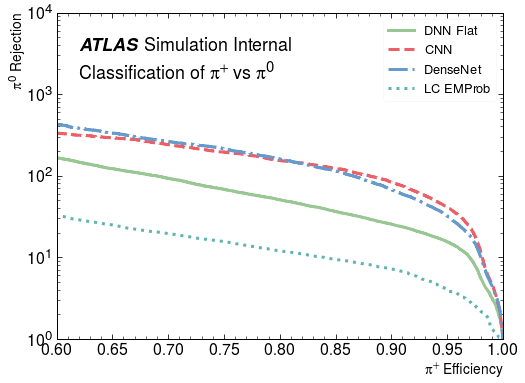

In [34]:
pu.roc_plot_scores([1-combine_score[:,1], 1-scores_p1_d02[:,1], 1-scores_dense_d02[:,1], pdata_merged.cluster_EM_PROBABILITY.to_numpy()], plabels, pdata_merged, 
            figfile = plotpath+'model_compare_wide.pdf',
            labels = ['DNN Flat','CNN', 'DenseNet', 'LC EMProb'],
            x_min = 0.6, x_max = 1.0, y_min = 1, y_max = 10000, 
            x_log = False, y_log = True, rejection = True, 
            x_label = '$\pi^{+}$ Efficiency', y_label = '$\pi^{0}$ Rejection',
            atlas_x = 0.05, atlas_y = 0.925, simulation = True,
            linestyles = ['-','--','-.',':'], colorgrouping = -1,
            textlist = [{'x': 0.05, 'y': 0.8, 'text': 'Classification of $\pi^{+}$ vs $\pi^{0}$'}])

In [31]:
model_combine = tf.keras.models.load_model(modelpath+"model_deep_do20.h5")

In [32]:
combine_score = model_combine.predict(
    [ pcells_flat_merged[layer] for layer in mu.cell_meta ]
)

In [35]:
pdata_merged.to_pickle(modelpath+'pdata_merged.pkl')

In [37]:
with open(modelpath+'pdata_nd.npy', 'wb') as f:
    np.save(f, plabels)
    np.save(f, combine_score)
    np.save(f, scores_p1_d02)
    np.save(f, scores_dense_d02)